In [2]:
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt


# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "camera_cal/calibration_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]


#Read and display the original image
img = mpimg.imread('test_images/straight_lines1.jpg')

plt.imshow(img)


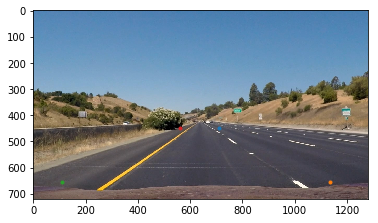

In [4]:
%matplotlib inline

# source image points

plt.imshow(img)
plt.plot(710, 450, '.') #top right
plt.plot(1135,655, '.') #bottom right
plt.plot(110,655,'.') #bottom left
plt.plot(560,450,'.')#top left

In [5]:
# define perspective transform function
def warp(img):
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    #Define calibration box in source and destination coordinates
    img_size = (img.shape[1],img.shape[0])
    
    #Four source coordinates
    src = np.float32(
    [[710,450],[1135,655],[110,655],[560,450]])
    
    #Four desired coordinates
    dst = np.float32(
    [[1135,20],[1135,655],[110,655],[110,20]])
    
    #Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src,dst)
    
    #Could compute the inverse M
    Iver_M = cv2.getPerspectiveTransform(dst,src)
    
    #Create warped image - uses linear interpolation
    warped = cv2.warpPerspective(undist,M,img_size,flags=cv2.INTER_LINEAR)
    
    return warped

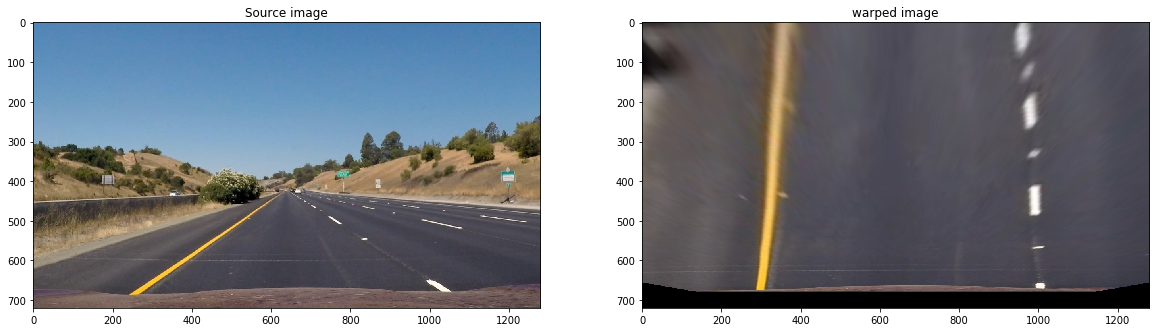

In [6]:
%matplotlib inline

#Get perspective transform
warped_im = warp(img)

#VIsualize undistortion
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Source image")
ax1.imshow(img)
ax2.set_title('warped image')
ax2.imshow(warped_im)